In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root = 'data/',download = True)

In [3]:
train_dataset=MNIST(root='data/' , train = True)
len(train_dataset)

60000

In [4]:
test_dataset=MNIST(root='data/', train = False)
len(test_dataset)

10000

In [5]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label : 5


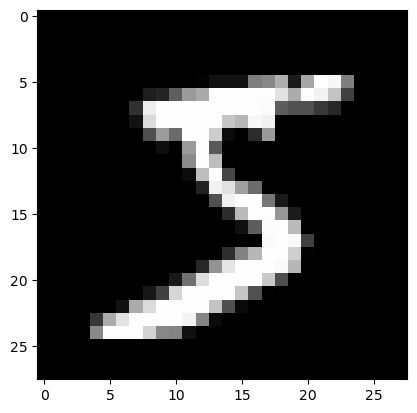

In [7]:
image,label =train_dataset[0]
plt.imshow(image,cmap="gray")
print("Label :",label)

Label : 3


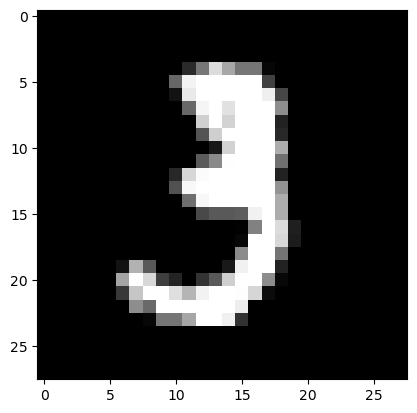

In [8]:
image,label =train_dataset[10]
plt.imshow(image,cmap="gray")
print("Label :",label)

In [9]:
# Takes data in any format and convert it into tensor format
import torchvision.transforms as transforms

In [10]:
train_data=MNIST(root = 'data/',
                 train = True,
                 transform = transforms.ToTensor())

In [11]:
# Image tensor and shape of image
img_tensor,label = train_data[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
# Sample values from image tensor
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


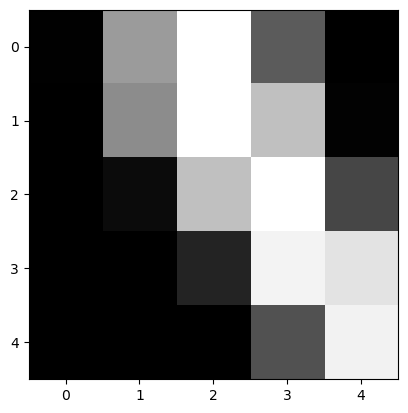

In [13]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

## Training and Validation Datasets

In [14]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(train_data , [50000, 10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

## Model

In [16]:
import torch.nn as nn
input_size=28*28
num_classes =10

#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight , model.parameters


torch.Size([10, 784])


(Parameter containing:
 tensor([[ 0.0048, -0.0161,  0.0087,  ..., -0.0264, -0.0318, -0.0085],
         [-0.0252,  0.0059, -0.0253,  ..., -0.0251,  0.0025, -0.0096],
         [-0.0148, -0.0203, -0.0183,  ...,  0.0316,  0.0021,  0.0289],
         ...,
         [ 0.0299,  0.0265, -0.0283,  ..., -0.0027,  0.0166,  0.0330],
         [ 0.0227,  0.0026, -0.0315,  ..., -0.0256, -0.0288,  0.0096],
         [ 0.0143, -0.0106,  0.0066,  ..., -0.0311, -0.0131,  0.0252]],
        requires_grad=True),
 <bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0086,  0.0350,  0.0245, -0.0337,  0.0080, -0.0081, -0.0265,  0.0189,
        -0.0188,  0.0193], requires_grad=True)

In [19]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([9, 2, 2, 3, 4, 4, 2, 0, 7, 5, 7, 6, 2, 7, 1, 6, 0, 1, 1, 6, 5, 9, 4, 8,
        5, 2, 1, 9, 2, 3, 1, 5, 8, 9, 5, 1, 9, 1, 0, 9, 4, 4, 1, 4, 5, 7, 2, 3,
        7, 6, 0, 6, 6, 9, 3, 8, 7, 9, 0, 3, 9, 2, 8, 9, 8, 8, 8, 8, 5, 2, 2, 9,
        7, 9, 0, 0, 9, 3, 1, 8, 0, 1, 6, 1, 8, 9, 3, 0, 3, 2, 1, 4, 6, 3, 0, 9,
        6, 8, 7, 4, 4, 0, 3, 0, 1, 1, 2, 2, 8, 8, 9, 9, 0, 7, 8, 1, 9, 7, 2, 6,
        0, 7, 4, 1, 8, 1, 4, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [20]:
images.shape

torch.Size([128, 1, 28, 28])

In [21]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

In [23]:
model=MnistModel()

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0225, -0.0013,  0.0058,  ...,  0.0021, -0.0051, -0.0202],
         [ 0.0303, -0.0151,  0.0123,  ..., -0.0031, -0.0214, -0.0067],
         [-0.0024, -0.0034, -0.0210,  ...,  0.0043, -0.0151, -0.0288],
         ...,
         [ 0.0314, -0.0050, -0.0035,  ...,  0.0102, -0.0333,  0.0345],
         [-0.0076, -0.0136, -0.0138,  ...,  0.0128,  0.0093,  0.0249],
         [-0.0146,  0.0044,  0.0211,  ...,  0.0202,  0.0009, -0.0216]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0143,  0.0272, -0.0185,  0.0309, -0.0139,  0.0293,  0.0313, -0.0198,
         -0.0219,  0.0160], requires_grad=True)]

In [25]:
for images,labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print(f"Outputs shape : {outputs.shape}")
print(f"Sample outputs: {outputs[:2].data}")

torch.Size([128, 1, 28, 28])
Outputs shape : torch.Size([128, 10])
Sample outputs: tensor([[-0.1958,  0.2130, -0.2188,  0.0581, -0.1592, -0.1185, -0.2382, -0.1161,
         -0.0622,  0.2244],
        [-0.2762,  0.1673, -0.0790,  0.0745, -0.1056, -0.0251, -0.2309, -0.1746,
         -0.1189,  0.1873]])


In [26]:
import torch.nn.functional as F

In [27]:
# Apply softmax for aech output row
probs= F.softmax(outputs, dim=1)

# Look at sample probabilities

print(f"sample probabilities\n {probs[:2].data}")

# Add up the probabilities of the output row

print(f"Sum: {torch.sum(probs[0]).item()}")

sample probabilities
 tensor([[0.0862, 0.1298, 0.0843, 0.1112, 0.0895, 0.0932, 0.0827, 0.0934, 0.0986,
         0.1313],
        [0.0795, 0.1238, 0.0968, 0.1129, 0.0943, 0.1022, 0.0832, 0.0880, 0.0930,
         0.1264]])
Sum: 1.0


In [28]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 9, 5, 1, 9, 5, 5, 7, 1, 9, 1, 9, 9, 1, 9, 6, 3, 9, 1, 5, 5, 9, 5,
        1, 1, 9, 1, 7, 5, 1, 1, 3, 5, 1, 9, 1, 1, 5, 5, 7, 1, 3, 5, 1, 1, 8, 9,
        9, 1, 3, 7, 0, 9, 9, 5, 3, 7, 3, 1, 1, 5, 3, 1, 5, 5, 9, 1, 2, 2, 2, 9,
        9, 5, 2, 3, 9, 1, 1, 3, 1, 5, 3, 7, 5, 1, 9, 9, 1, 9, 5, 1, 1, 1, 7, 9,
        5, 1, 9, 1, 9, 1, 1, 1, 0, 1, 1, 9, 5, 3, 7, 9, 5, 5, 1, 5, 0, 5, 3, 9,
        1, 5, 5, 3, 1, 5, 9, 9])
tensor([0.1313, 0.1264, 0.1226, 0.1152, 0.1378, 0.1212, 0.1311, 0.1256, 0.1213,
        0.1162, 0.1226, 0.1381, 0.1576, 0.1600, 0.1152, 0.1252, 0.1131, 0.1337,
        0.1132, 0.1407, 0.1228, 0.1348, 0.1317, 0.1158, 0.1195, 0.1366, 0.1369,
        0.1332, 0.1290, 0.1531, 0.1222, 0.1339, 0.1364, 0.1173, 0.1507, 0.1514,
        0.1263, 0.1426, 0.1212, 0.1344, 0.1270, 0.1194, 0.1248, 0.1320, 0.1423,
        0.1447, 0.1245, 0.1175, 0.1400, 0.1406, 0.1308, 0.1144, 0.1163, 0.1308,
        0.1269, 0.1139, 0.1159, 0.1191, 0.1364, 0.1102, 0.1294, 0.1364, 0.1306,
       

In [29]:
labels

tensor([1, 1, 2, 1, 3, 1, 4, 5, 7, 4, 3, 8, 5, 8, 8, 7, 6, 3, 1, 2, 2, 7, 2, 6,
        6, 3, 5, 1, 0, 4, 9, 8, 1, 5, 8, 8, 1, 2, 7, 3, 0, 7, 0, 4, 5, 2, 2, 0,
        3, 3, 4, 0, 7, 5, 8, 4, 2, 6, 5, 7, 7, 8, 0, 7, 4, 5, 9, 8, 6, 0, 0, 1,
        8, 4, 0, 3, 3, 2, 0, 1, 5, 8, 9, 6, 6, 1, 7, 7, 1, 2, 3, 8, 2, 1, 2, 8,
        9, 2, 9, 0, 5, 8, 9, 1, 4, 3, 9, 0, 4, 4, 2, 4, 4, 5, 7, 0, 5, 8, 2, 6,
        9, 4, 4, 1, 0, 3, 1, 3])

In [30]:
torch.sum(preds==labels)

tensor(16)

## Evaluation Metric and Loss Function

In [31]:
def accuracy(outputs, labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [32]:
accuracy(outputs,labels)

tensor(0.1250)

In [33]:
outputs

tensor([[-0.1958,  0.2130, -0.2188,  ..., -0.1161, -0.0622,  0.2244],
        [-0.2762,  0.1673, -0.0790,  ..., -0.1746, -0.1189,  0.1873],
        [-0.0912,  0.1898, -0.1182,  ...,  0.1535, -0.1766,  0.2029],
        ...,
        [-0.3665,  0.1313, -0.0261,  ..., -0.1115,  0.2664, -0.0259],
        [-0.1718,  0.1357, -0.3268,  ...,  0.0136, -0.4828,  0.3000],
        [-0.4224,  0.1211,  0.1403,  ...,  0.0556, -0.2112,  0.2834]],
       grad_fn=<AddmmBackward0>)

In [34]:
loss_fn = F.cross_entropy

In [35]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3228, grad_fn=<NllLossBackward0>)


In [36]:
# Utility function to train the model

def fit(num_epochs,lr,model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history=[] # For recording epoch wise results

    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history
        

In [37]:
def evaluate(model, val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [38]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out= self.linear(xb)
        return out
        
    def training_step(self,batch):
        images, labels = batch
        out = self(images)                  # Takes image as input by the class object and generate prediction
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out = self(images)                  # Takes image as input by the class object and generate prediction
        loss = F.cross_entropy(out, labels) #Calculate loss
        acc = accuracy(out, labels)         #Calculate accuracy
        return {'val_loss': loss, 'val_acc' :acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()    # Combine accuracies
        return {'val_loss':epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self,epoch,result):
        print(f"Epoch {epoch} , val_loss: {result['val_loss']} , val_acc: {result['val_acc']}")

In [39]:
model=MnistModel()

In [40]:
result0= evaluate(model, val_loader)
result0

{'val_loss': 2.342298746109009, 'val_acc': 0.08257515728473663}

In [41]:
history1 = fit(5,0.001, model,train_loader,val_loader)

Epoch 0 , val_loss: 1.9664889574050903 , val_acc: 0.6050237417221069
Epoch 1 , val_loss: 1.6940079927444458 , val_acc: 0.7191455960273743
Epoch 2 , val_loss: 1.491442084312439 , val_acc: 0.753757894039154
Epoch 3 , val_loss: 1.3389023542404175 , val_acc: 0.7735363841056824
Epoch 4 , val_loss: 1.2216955423355103 , val_acc: 0.7893591523170471


In [42]:
history2 = fit(5,0.001, model,train_loader,val_loader)

Epoch 0 , val_loss: 1.129822015762329 , val_acc: 0.7989517450332642
Epoch 1 , val_loss: 1.0561370849609375 , val_acc: 0.8070608973503113
Epoch 2 , val_loss: 0.995890736579895 , val_acc: 0.8126977682113647
Epoch 3 , val_loss: 0.9457451701164246 , val_acc: 0.8178402185440063
Epoch 4 , val_loss: 0.9033287167549133 , val_acc: 0.8232792615890503


In [43]:
history3 = fit(5,0.001, model,train_loader,val_loader)

Epoch 0 , val_loss: 0.8670108914375305 , val_acc: 0.8264438509941101
Epoch 1 , val_loss: 0.8355069756507874 , val_acc: 0.8296083807945251
Epoch 2 , val_loss: 0.8079581260681152 , val_acc: 0.8322784900665283
Epoch 3 , val_loss: 0.7836190462112427 , val_acc: 0.8350474834442139
Epoch 4 , val_loss: 0.7618813514709473 , val_acc: 0.8383108973503113


In [44]:
history4 = fit(5,0.001, model,train_loader,val_loader)

Epoch 0 , val_loss: 0.7424095273017883 , val_acc: 0.8398932218551636
Epoch 1 , val_loss: 0.7248820066452026 , val_acc: 0.8426621556282043
Epoch 2 , val_loss: 0.7089653611183167 , val_acc: 0.8442444801330566
Epoch 3 , val_loss: 0.6944640874862671 , val_acc: 0.8460245132446289
Epoch 4 , val_loss: 0.6811038851737976 , val_acc: 0.8479034900665283


In [45]:
history5 = fit(5,0.001, model,train_loader,val_loader)

Epoch 0 , val_loss: 0.6688832640647888 , val_acc: 0.8495846390724182
Epoch 1 , val_loss: 0.6575096845626831 , val_acc: 0.8512658476829529
Epoch 2 , val_loss: 0.6469974517822266 , val_acc: 0.8528481125831604
Epoch 3 , val_loss: 0.6372058987617493 , val_acc: 0.8539358973503113
Epoch 4 , val_loss: 0.6280723214149475 , val_acc: 0.8551226258277893


Text(0.5, 1.0, 'Accuracy vs No. of Epochs')

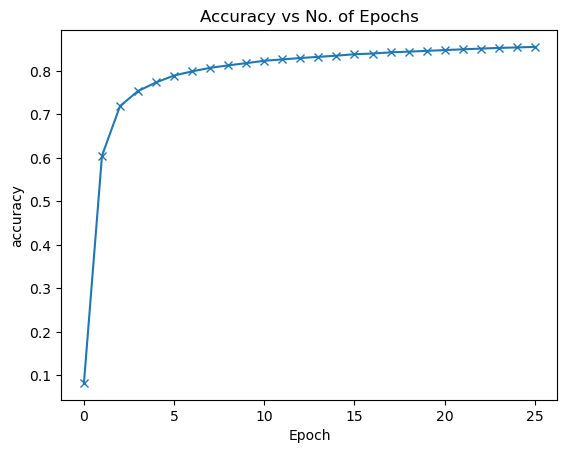

In [46]:
history = [result0] + history1+history2+history3+history4+history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies,"-x")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of Epochs')

### Testing with Individual images

In [47]:
# Define test dataset
test_dataset = MNIST(root = 'data/', train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


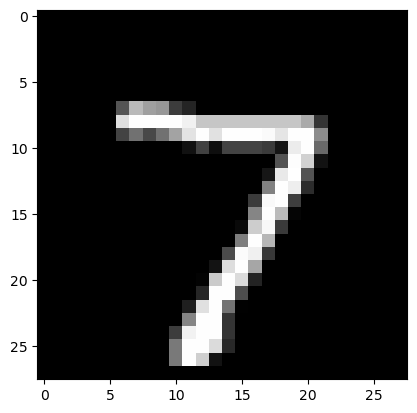

In [48]:
img,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:' , img.shape)
print('Label:' ,label)

In [49]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()

Label: 7 ,Predicted: 7


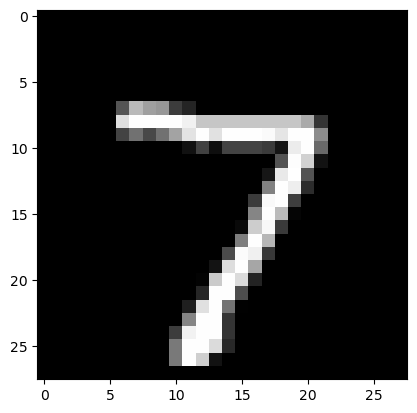

In [50]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:' , predict_image(img,model))

Label: 0 ,Predicted: 0


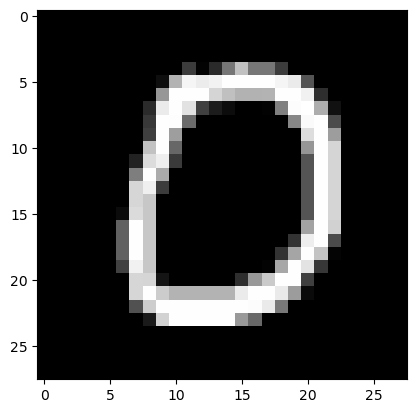

In [51]:
img,label=test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:' , predict_image(img,model))

Label: 9 ,Predicted: 9


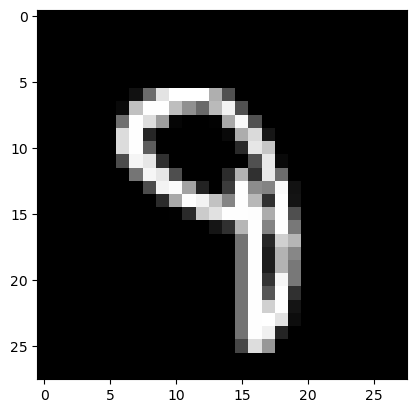

In [52]:
img,label=test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:' , predict_image(img,model))

Label: 2 ,Predicted: 8


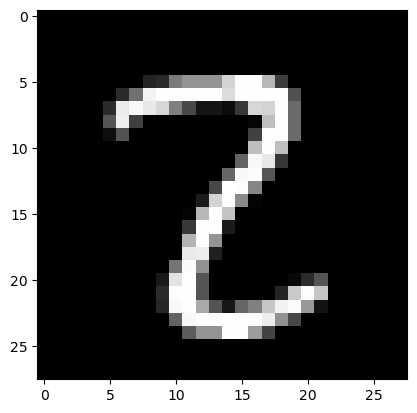

In [53]:
img,label=test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:' , predict_image(img,model))

In [54]:
test_loader=DataLoader(test_dataset, batch_size=256)
result = evaluate(model,test_loader)
result

{'val_loss': 0.5901200771331787, 'val_acc': 0.8646484613418579}

### Save Model

In [55]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [56]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0217, -0.0144,  0.0241,  ...,  0.0296,  0.0353,  0.0207],
                      [ 0.0316, -0.0263,  0.0140,  ..., -0.0155, -0.0120, -0.0071],
                      [ 0.0140, -0.0151, -0.0064,  ..., -0.0217, -0.0243, -0.0273],
                      ...,
                      [ 0.0223,  0.0104, -0.0020,  ..., -0.0187, -0.0226, -0.0129],
                      [ 0.0290, -0.0099, -0.0201,  ..., -0.0031,  0.0012, -0.0195],
                      [ 0.0162, -0.0296,  0.0240,  ...,  0.0007, -0.0153,  0.0316]])),
             ('linear.bias',
              tensor([-0.0358,  0.0939, -0.0148, -0.0318,  0.0229,  0.0635, -0.0364,  0.0241,
                      -0.0801,  0.0222]))])

In [57]:
model2=MnistModel()

In [58]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.9836e-02,  3.1494e-02, -1.5998e-02,  ..., -2.3677e-02,
                       -1.8277e-02,  8.6806e-03],
                      [ 2.1145e-02,  3.2980e-02,  8.2243e-03,  ..., -3.4948e-02,
                       -3.5319e-02,  3.0369e-02],
                      [-6.8659e-03,  1.8404e-03, -1.5445e-03,  ...,  8.8045e-04,
                       -1.6078e-02,  1.0251e-02],
                      ...,
                      [-9.8804e-04, -3.3294e-02,  2.9393e-02,  ..., -1.3869e-02,
                       -9.9110e-03,  2.4418e-03],
                      [-2.5727e-02,  9.6949e-03,  1.7802e-02,  ..., -3.4264e-02,
                       -3.9837e-03, -1.1493e-02],
                      [-1.1665e-02,  9.5289e-05,  2.3776e-02,  ...,  2.2795e-02,
                       -9.3515e-03, -1.0368e-02]])),
             ('linear.bias',
              tensor([-0.0303,  0.0017,  0.0068,  0.0214,  0.0126,  0.0103, -0.0143, -0.0332,
                      -0.0147,

In [59]:
evaluate(model2,test_loader)

{'val_loss': 2.3155133724212646, 'val_acc': 0.11249999701976776}

In [60]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))

<All keys matched successfully>

In [61]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0217, -0.0144,  0.0241,  ...,  0.0296,  0.0353,  0.0207],
                      [ 0.0316, -0.0263,  0.0140,  ..., -0.0155, -0.0120, -0.0071],
                      [ 0.0140, -0.0151, -0.0064,  ..., -0.0217, -0.0243, -0.0273],
                      ...,
                      [ 0.0223,  0.0104, -0.0020,  ..., -0.0187, -0.0226, -0.0129],
                      [ 0.0290, -0.0099, -0.0201,  ..., -0.0031,  0.0012, -0.0195],
                      [ 0.0162, -0.0296,  0.0240,  ...,  0.0007, -0.0153,  0.0316]])),
             ('linear.bias',
              tensor([-0.0358,  0.0939, -0.0148, -0.0318,  0.0229,  0.0635, -0.0364,  0.0241,
                      -0.0801,  0.0222]))])

In [62]:
test_loader = DataLoader(test_dataset, batch_size=256)
result=evaluate(model2,test_loader)
result

{'val_loss': 0.5901200771331787, 'val_acc': 0.8646484613418579}